In [36]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

NUM_DATASET = 1000

random.seed(555)
random_set = [random.randint(0,NUM_DATASET) for i in range(5)]

<h1> IMPORT INPUT </h1>

In [37]:
file_path = "data/"
cols = ['id', 'u', 'v', 'a', 'b', 'theta']

dfs = []

for i in range(NUM_DATASET):
    file_name = f"feature_{i}.csv"
    data = np.loadtxt(file_path+file_name, delimiter=",")
    df = pd.DataFrame(data,columns=cols)
    dfs.append(df)


file_name = f"feature_ref.csv"
data = np.loadtxt(file_path+file_name, delimiter=",")
df = pd.DataFrame(data,columns=cols)
dfs.append(df)


dfs[0].head(10)



,id,u,v,a,b,theta
0,0.0,445.369537,641.038757,13.504459,16.424423,101.501854
1,1.0,539.000000,640.000000,13.891265,16.200386,92.170364
2,2.0,353.901062,638.428711,13.124970,16.586863,110.217934
3,3.0,630.920227,635.059509,13.190111,15.918247,73.947716
4,4.0,266.545502,632.870544,13.344576,16.251438,139.484665
5,5.0,719.438416,630.107666,13.395476,15.565778,69.344612
6,6.0,806.707764,626.076538,14.509491,15.818003,70.247169
7,7.0,540.035339,561.528931,15.011006,17.508699,75.167397
8,8.0,439.838043,560.523865,14.383520,17.789904,106.253502
9,9.0,636.442688,553.968811,14.568960,17.014805,54.160770


In [38]:
dfs[-1].head(10)

,id,u,v,a,b,theta
0,0.0,803.965149,623.419861,14.697781,16.319790,104.875824
1,1.0,715.955444,623.327637,15.303060,15.828406,71.627502
2,2.0,627.491516,623.381653,14.482323,15.310994,166.188141
3,3.0,539.826965,623.455688,15.064923,15.931067,86.769798
4,4.0,451.508636,623.462952,14.376225,14.983026,11.096942
5,5.0,363.683502,623.468140,14.979533,15.643559,79.552597
6,6.0,275.243988,623.500000,14.535371,15.748683,90.000000
7,7.0,803.993225,535.230652,14.872648,15.456981,102.914482
8,8.0,716.003723,535.274780,15.154341,15.853118,87.607521
9,9.0,627.512146,535.226074,14.590197,15.258834,178.938843


In [39]:
# img_height = 1080
# img_width = 720

# import math

# for i in range(NUM_DATASET):
#     dfs[i]['u_norm'] = dfs[i]['u']/img_height
#     dfs[i]['v_norm'] = dfs[i]['v']/img_width
#     dfs[i]['ratio'] = dfs[i]['a']/dfs[i]['b']
#     dfs[i]['cos'] = np.cos(dfs[i]['theta']/180*math.pi)
#     dfs[i]['sin'] = np.sin(dfs[i]['theta']/1803_000*math.pi)

# dfs[0].head(10)

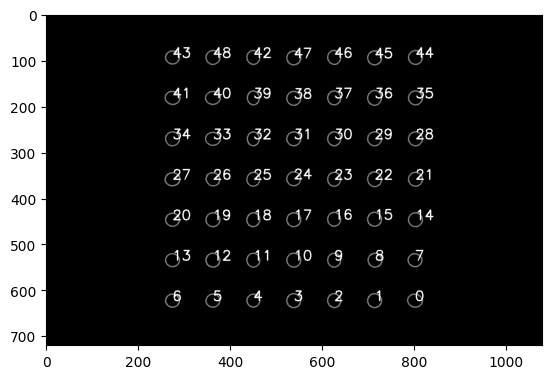

In [40]:
def show_ellipses(df):
    # create a black image
    img = np.zeros([720, 1080], np.uint8)
    i = 0
    # iterate over each row in the dataframe
    for index, row in df.iterrows():
        id = int(row['id'])
        u = row['u']
        v = row['v']
        a = row['a']
        b = row['b']
        theta = row['theta']

        center = (int(u), int(v))
        axes = (int(a), int(b))
        angle = theta

        # draw the ellipse on the image
        cv2.ellipse(img, center, axes, angle, 0, 360, (125, 255, 255), 2)
        cv2.putText(img, str(id), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_4)
        i+=1

    # display the image using pyplot
    plt.imshow(img, cmap="gray")
    plt.show()

# for i in random_set:
#     show_ellipses(dfs[i])
show_ellipses(dfs[-1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


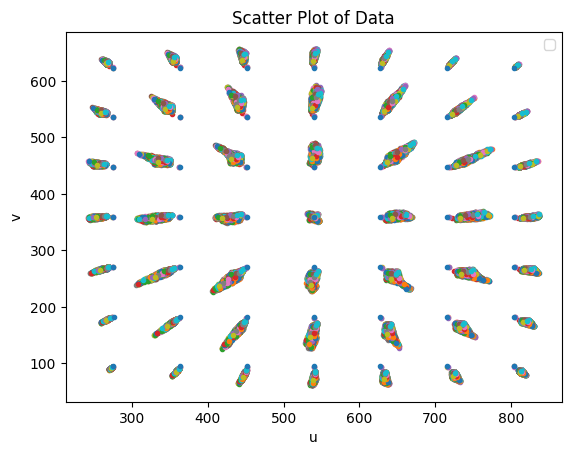

In [41]:
import matplotlib.pyplot as plt

# Assuming your array of DataFrames is named data_array
for i, df in enumerate(dfs):
    # Extract the 'u' and 'v' columns from the DataFrame
    u = df['u']
    v = df['v']

    # Create a scatter plot with 'u' on the x-axis and 'v' on the y-axis
    plt.scatter(u, v, marker=".")

# Add axis labels, a title, and a legend
plt.xlabel('u')
plt.ylabel('v')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

<h1> Using DBSCAN to discriminate each point </h1>

In [42]:
## prepare data

dot_positions = np.zeros((0,2))

for df in dfs:
    # Extract the 'u' and 'v' columns from the DataFrame100
    u = df['u'].values.reshape((-1, 1))
    v = df['v'].values.reshape((-1, 1))

    # Concatenate the 'u' and 'v' columns into a single ndarray
    positions = np.concatenate((u, v), axis=1)

    # Append the positions to the dot_positions ndarray
    dot_positions = np.vstack((dot_positions, positions))

print("shape" ,dot_positions.shape)
dot_positions

shape (49049, 2)


array([[445.36953735, 641.03875732],
       [539.        , 640.        ],
       [353.90106201, 638.42871094],
       ...,
       [627.70587158,  94.972435  ],
       [539.80371094,  95.0058136 ],
       [363.56658936,  94.88175201]])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}


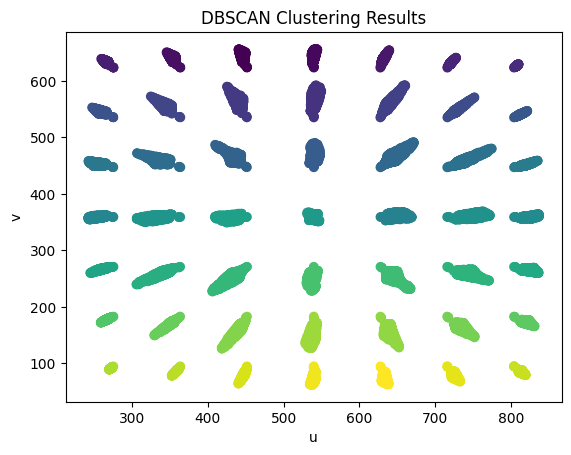

In [43]:
from sklearn.cluster import KMeans,DBSCAN


# Assuming your data is in an ndarray named dot_positions with shape (N, 2)
dbscan = DBSCAN(eps=20, min_samples=5)  # Initialize the DBSCAN clustering algorithm with eps and min_samples parameters

cluster_labels = dbscan.fit_predict(dot_positions)  # Fit the DBSCAN algorithm to the data and get the cluster assignments

# Create a scatter plot with 'u' on the x-axis and 'v' on the y-axis, color-coded by cluster assignment
plt.scatter(dot_positions[:, 0], dot_positions[:, 1], c=cluster_labels)

# Add axis labels and a title
print(set(cluster_labels))
plt.xlabel('u')
plt.ylabel('v')
plt.title('DBSCAN Clustering Results')
plt.show()    
data = np.loadtxt(file_path+file_name, delimiter=",")
df = pd.DataFrame(data,columns=cols)

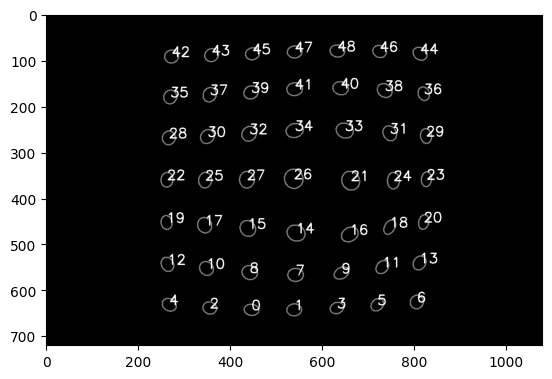

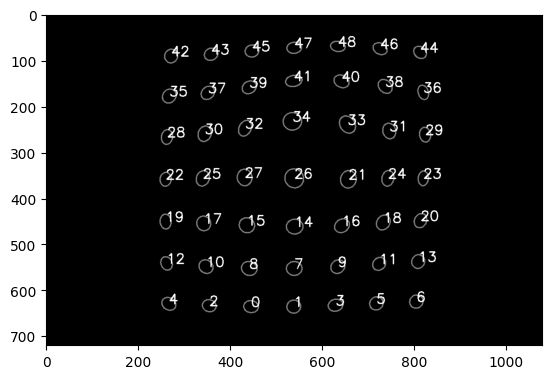

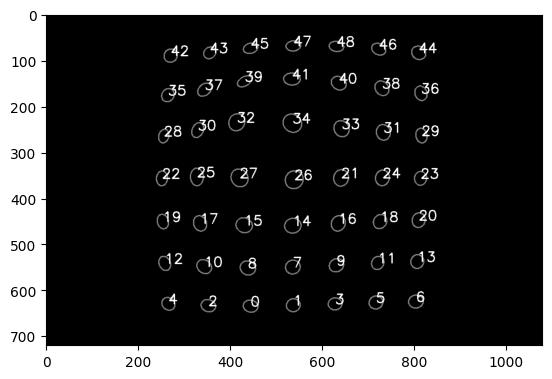

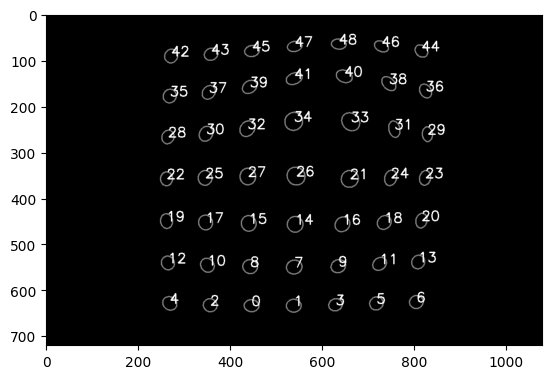

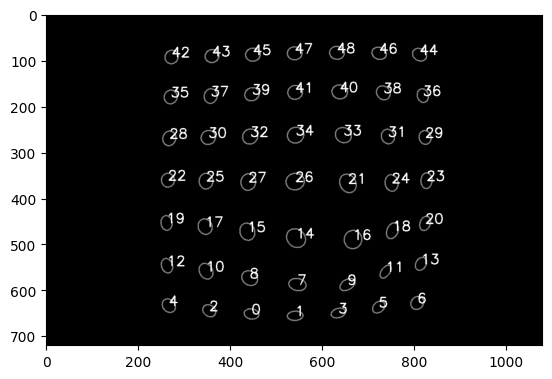

In [44]:
stride = int(len(cluster_labels)/len(dfs))

bad_data_index = []

for i in range(len(dfs)):
    labels = cluster_labels[i*stride:(i+1)*stride]
    if -1 in labels:
        bad_data_index.append(i)
        pass

    dfs[i]['id'] = labels

for i in random_set:
    show_ellipses(dfs[i])


In [45]:
dfs = [dfs[i] for i in range(len(dfs)) if i not in bad_data_index]

for df in dfs:
    df.sort_values('id', inplace=True, ignore_index=True)

for i in random_set:
    print(dfs[i].head(5))

   id           u           v          a          b       theta
0   0  447.556366  643.041077  12.921886  16.644196   94.700111
1   1  540.705444  643.762329  13.188049  16.087023   86.829399
2   2  356.165497  639.129333  13.050136  15.719178  108.759438
3   3  633.088928  639.634827  12.658457  15.998045   68.433884
4   4  268.125854  632.457397  13.935743  16.244465  117.178322
   id           u           v          a          b       theta
0   0  446.707336  636.842712  13.390079  16.623678   96.032471
1   1  539.078369  636.112915  14.110044  15.760085   85.490936
2   2  355.646820  634.997498  13.517214  15.840330  107.172928
3   3  630.475647  633.048645  13.431252  16.264252   77.865639
4   4  267.947266  630.660217  13.904789  16.222706  120.447121
   id           u           v          a          b       theta
0   0  445.530914  635.841003  13.700415  16.786762  101.066544
1   1  538.105530  633.998413  14.379488  15.764100   79.965645
2   2  353.810181  634.471802  13.254790

<h1> Preprocessing Data </h1>

In [46]:
df_ref = dfs[-1]
tmp = [df.copy() for df in dfs]

for i in range(len(tmp)):
    tmp[i]['u_norm'] = tmp[i]['u'] - df_ref['u']
    tmp[i]['v_norm'] = tmp[i]['v'] - df_ref['v']

for i in random_set:
    print(tmp[i].head(5))

   id           u           v          a          b       theta    u_norm  \
0   0  447.556366  643.041077  12.921886  16.644196   94.700111 -3.952271   
1   1  540.705444  643.762329  13.188049  16.087023   86.829399  0.878479   
2   2  356.165497  639.129333  13.050136  15.719178  108.759438 -7.518005   
3   3  633.088928  639.634827  12.658457  15.998045   68.433884  5.597412   
4   4  268.125854  632.457397  13.935743  16.244465  117.178322 -7.118134   

      v_norm  
0  19.578125  
1  20.306641  
2  15.661194  
3  16.253174  
4   8.957397  
   id           u           v          a          b       theta    u_norm  \
0   0  446.707336  636.842712  13.390079  16.623678   96.032471 -4.801300   
1   1  539.078369  636.112915  14.110044  15.760085   85.490936 -0.748596   
2   2  355.646820  634.997498  13.517214  15.840330  107.172928 -8.036682   
3   3  630.475647  633.048645  13.431252  16.264252   77.865639  2.984131   
4   4  267.947266  630.660217  13.904789  16.222706  120.44712

In [47]:
max_u, max_v = [],[]
for df in tmp:
    max_u.append(max(abs(df['u_norm'].max()),abs(df['u_norm'].min())))
    max_v.append(max(abs(df['v_norm'].max()),abs(df['v_norm'].min())))

print(f"max_u = {max(max_u)}")
print(f"max_v = {max(max_v)}")

max_u = 58.79803466796875
max_v = 57.2816162109375


In [48]:
DENOMINATOR_NORM = 80

df_ref = dfs[-1]

for i in range(len(dfs)):
    dfs[i]['u_norm'] = (dfs[i]['u'] - df_ref['u'])/DENOMINATOR_NORM
    dfs[i]['v_norm'] = (dfs[i]['v'] - df_ref['v'])/DENOMINATOR_NORM

dfs[0].head(10)

,id,u,v,a,b,theta,u_norm,v_norm
0,0,445.369537,641.038757,13.504459,16.424423,101.501854,-0.076739,0.219698
1,1,539.000000,640.000000,13.891265,16.200386,92.170364,-0.010337,0.206804
2,2,353.901062,638.428711,13.124970,16.586863,110.217934,-0.122281,0.187007
3,3,630.920227,635.059509,13.190111,15.918247,73.947716,0.042859,0.145973
4,4,266.545502,632.870544,13.344576,16.251438,139.484665,-0.108731,0.117132
5,5,719.438416,630.107666,13.395476,15.565778,69.344612,0.043537,0.084750
6,6,806.707764,626.076538,14.509491,15.818003,70.247169,0.034283,0.033208
7,7,540.035339,561.528931,15.011006,17.508699,75.167397,0.003235,0.328819
8,8,439.838043,560.523865,14.383520,17.789904,106.253502,-0.144708,0.315331
9,9,636.442688,553.968811,14.568960,17.014805,54.160770,0.111632,0.234284


In [49]:
file_path = "data/"
cols = ['id', 'u', 'v', 'a', 'b', 'theta']

output = []

dataSize = (17,17)

for i in range(NUM_DATASET):
    file_name = f"forceDist_{i}.csv"
    data = np.loadtxt(file_path+file_name, delimiter=",").reshape(dataSize)
    data = np.rot90(data)
    output.append(data)

output = [output[i] for i in range(len(output)) if i not in bad_data_index]
    

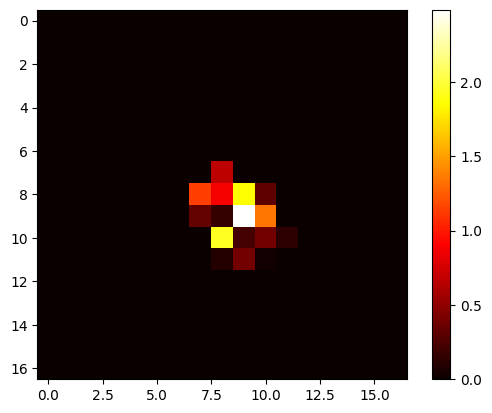

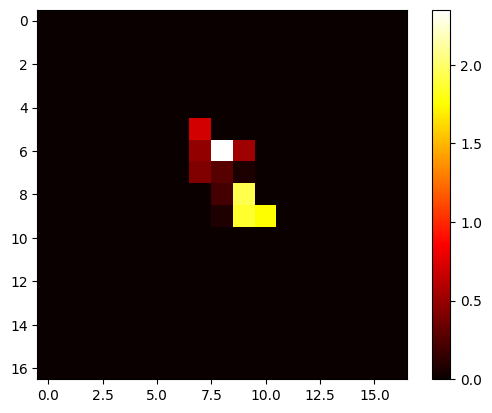

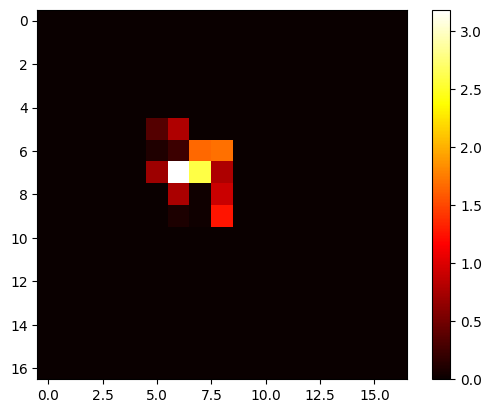

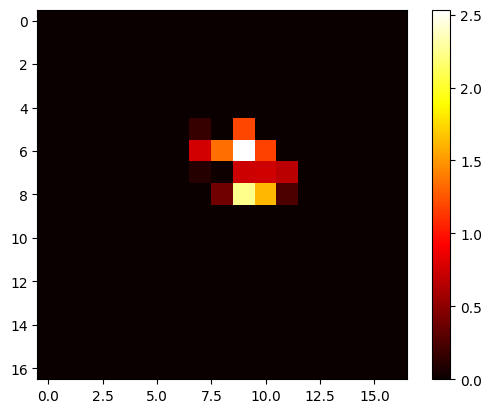

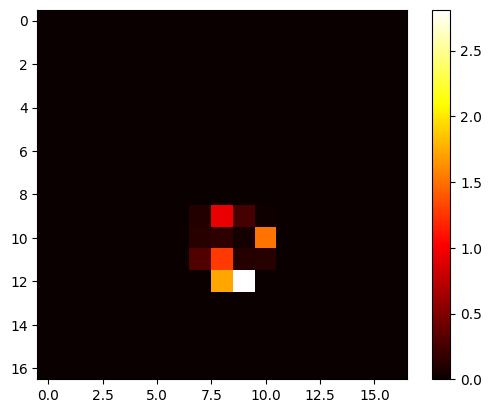

[None, None, None, None, None]

In [50]:
def showForceDist(data):
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

[showForceDist(output[i]) for i in random_set]


197


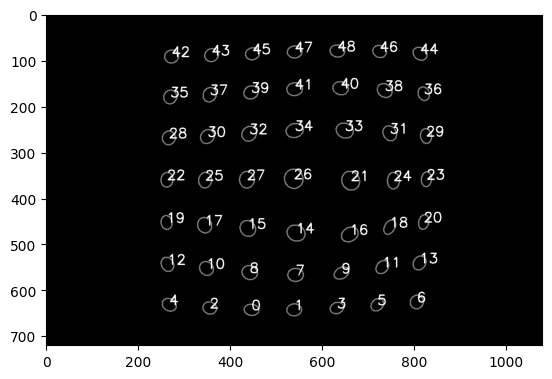

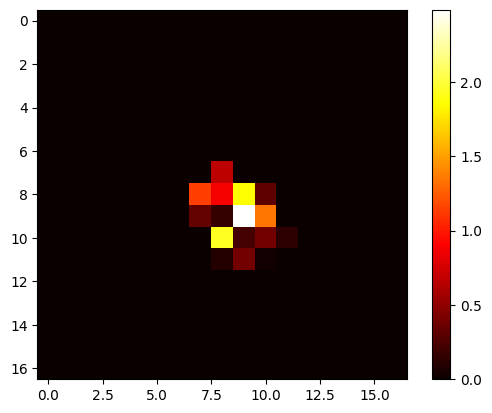

281


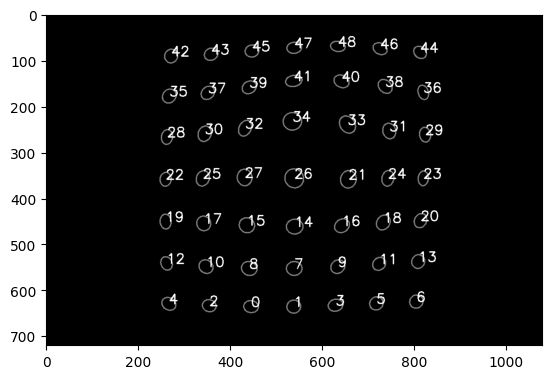

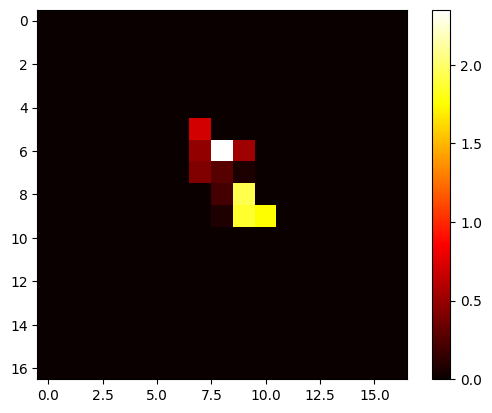

164


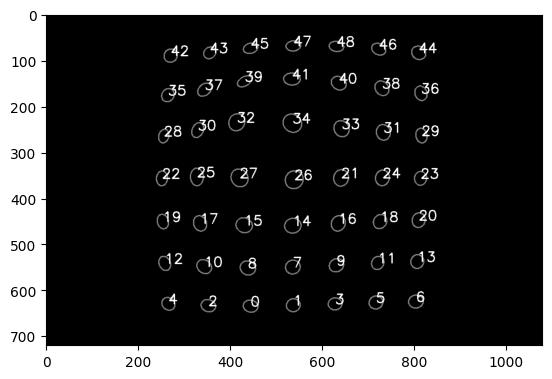

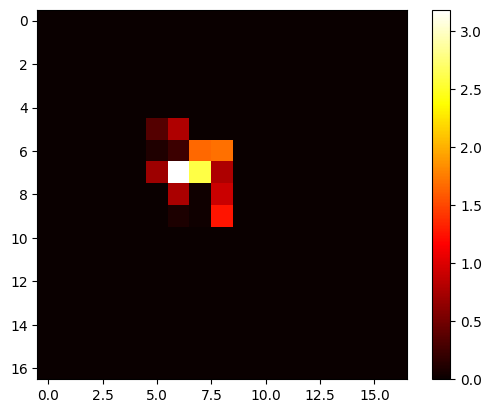

131


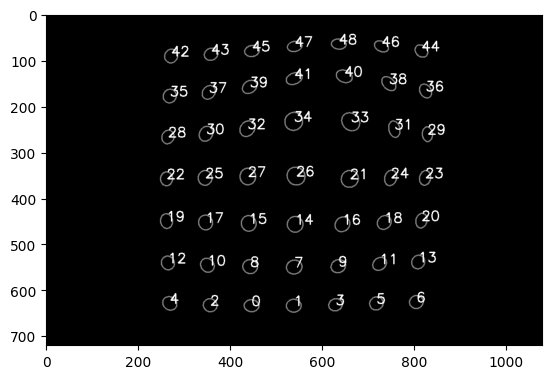

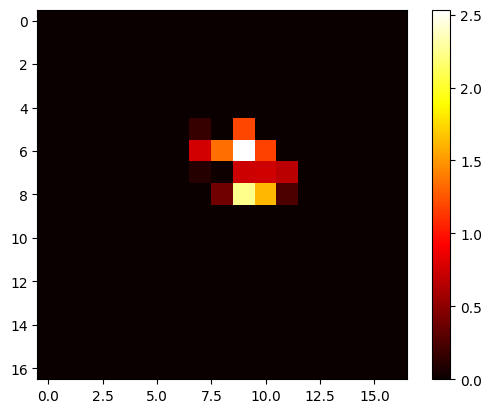

574


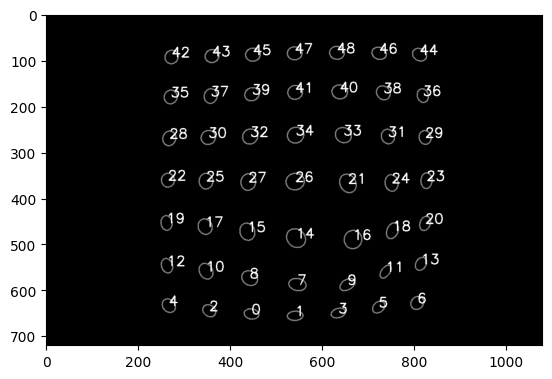

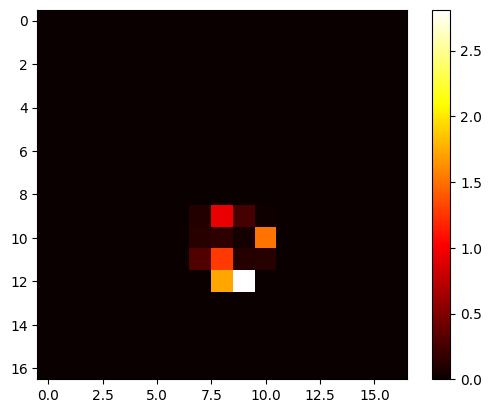

In [105]:
random.seed(10)

for i in random_set:
    print(i)
    show_ellipses(dfs[i])
    showForceDist(output[i])

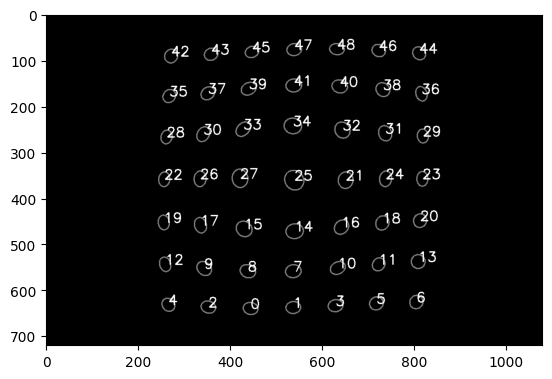

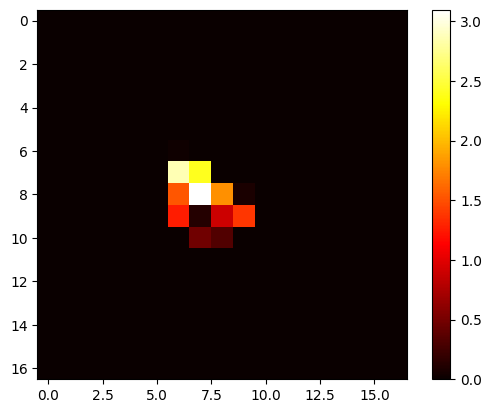

In [52]:
i = 60
file_name = f"feature_{i}.csv"
data = np.loadtxt(file_path+file_name, delimiter=",")
df = pd.DataFrame(data,columns=cols)
show_ellipses(df)
file_name = f"forceDist_{i}.csv"
data = np.loadtxt(file_path+file_name, delimiter=",").reshape(dataSize)
data = np.rot90(data)
showForceDist(data)

In [53]:
print(len(dfs),len(output))

1001 1000


In [54]:
selected_features = ['u_norm', 'v_norm']
input_data = [df[selected_features] for df in dfs]

input_data.pop(-1) ## excluded the reference data at last index
input_data[0].head(5)

,u_norm,v_norm
0,-0.076739,0.219698
1,-0.010337,0.206804
2,-0.122281,0.187007
3,0.042859,0.145973
4,-0.108731,0.117132


In [55]:
from sklearn.model_selection import train_test_split

# assume your input data X and output data y are already loaded and preprocessed

# output_reshape = [np.reshape(y,(1,17*17)) for y in output]
output_reshape = np.array(output)
output_reshape = output_reshape.reshape(output_reshape.shape[0], -1)


# set the test size (portion of data to use for testing)
test_size = 0.2

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(input_data), output_reshape, test_size=test_size, random_state=42)

# check the shapes of the resulting datasets
print(f"X_train shape: {len(X_train)}")
print(f"X_test shape: {len(X_test)}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")

X_train shape: 800
X_test shape: 200
y_train shape: 800
y_test shape: 200


In [56]:
input_dim = np.prod(np.array(input_data[0].shape))
output_dim = 17*17

print(input_dim)
print(output_dim)

98
289


In [95]:
from tensorflow import keras

# Define the input and output dimensions

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    keras.layers.Dense(256, activation='relu', input_dim=input_dim),
    # keras.layers.Dense(256, activation='linear', input_dim=input_dim), 
    keras.layers.Dense(output_dim, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['MSE','accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 128)               12672     
                                                                 
 dense_48 (Dense)            (None, 256)               33024     
                                                                 
 dense_49 (Dense)            (None, 289)               74273     
                                                                 
Total params: 119,969
Trainable params: 119,969
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = model.fit(X_train.reshape(-1, input_dim), y_train.reshape(-1, output_dim), epochs=5000, batch_size=NUM_DATASET, validation_data=(X_test.reshape(-1, input_dim), y_test.reshape(-1, output_dim)))

Epoch 1/5000
1/1 [==============================] - 0s 421ms/step - loss: 0.4729 - MSE: 0.1087 - accuracy: 0.0000e+00 - val_loss: 0.4069 - val_MSE: 0.1085 - val_accuracy: 0.0000e+00
Epoch 2/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.4059 - MSE: 0.1071 - accuracy: 0.0000e+00 - val_loss: 0.3560 - val_MSE: 0.1068 - val_accuracy: 0.0200
Epoch 3/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.3564 - MSE: 0.1054 - accuracy: 0.0338 - val_loss: 0.3413 - val_MSE: 0.1053 - val_accuracy: 0.0500
Epoch 4/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.3415 - MSE: 0.1038 - accuracy: 0.0637 - val_loss: 0.3318 - val_MSE: 0.1038 - val_accuracy: 0.0450
Epoch 5/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.3320 - MSE: 0.1023 - accuracy: 0.0587 - val_loss: 0.3232 - val_MSE: 0.1024 - val_accuracy: 0.0300
Epoch 6/5000
1/1 [==============================] - 0s 21ms/step - loss: 0.3230 - MSE: 0.1010 - accuracy: 0.0388 - val_los

dict_keys(['loss', 'MSE', 'accuracy', 'val_loss', 'val_MSE', 'val_accuracy'])


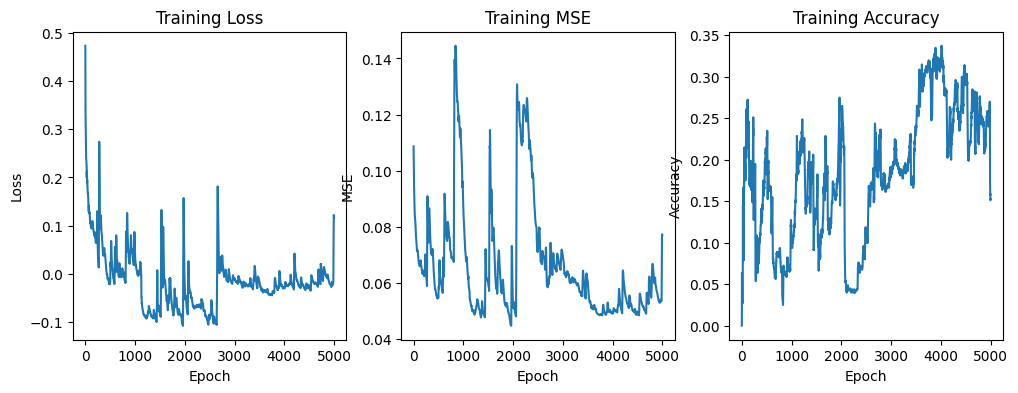

In [97]:
print(history.history.keys())


import matplotlib.pyplot as plt

# Set figure width and height
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot training loss
axs[0].plot(history.history['loss'])
axs[0].set_title('Training Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')

# Plot training MSE
axs[1].plot(history.history['MSE'])
axs[1].set_title('Training MSE')
axs[1].set_ylabel('MSE')
axs[1].set_xlabel('Epoch')

# Plot training accuracy
axs[2].plot(history.history['accuracy'])
axs[2].set_title('Training Accuracy')
axs[2].set_ylabel('Accuracy')
axs[2].set_xlabel('Epoch')

plt.show()


In [1]:
i = 572
res = model.predict(np.array(input_data[i]).reshape(-1,input_dim))

print("input")
show_ellipses(dfs[i])
print("predict")
showForceDist(res.reshape(17,17))
print("ground_truth")
showForceDist(output[i])

NameError: name 'model' is not defined